# Gender Pay Gap in Data📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->
The problem that I am trying to address is that women are making less than men within the tech industry.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

The question I am seeking to answer is if the statment is true that women are getting paid less and why that is. Also see if there any other factors of why this could be. I would like to also figure out a solution on how to address the problem.

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

There will be a large gap of what a women is getting paid compare to male counterparts. I believe women in the same industry with the same titles will be making less. I think there will be some variables such as city that could play a role. 

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->
https://www.census.gov/library/visualizations/interactive/gender-pay-gap.html 
https://www.kaggle.com/datasets/nilimajauhari/glassdoor-analyze-gender-pay-gap 
https://www.kaggle.com/code/dulciejackson/gender-pay-gap-data-investigation 
I will relate these datasets by using powerbi to combine information that will correalte such as companies, states, salary and things of that nature. 

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

# Start your code here
What I plan on doing is first investing the data and getting rid of any data that isnt needed. My main aproach is 
using correlations with titles first and comparing that to the slaaries. Next I will use educational level that also see the correlation. 

In [19]:
# Load the data
glassdoor_df = pd.read_csv('Glassdoor Gender Pay Gap.csv', encoding='ascii')

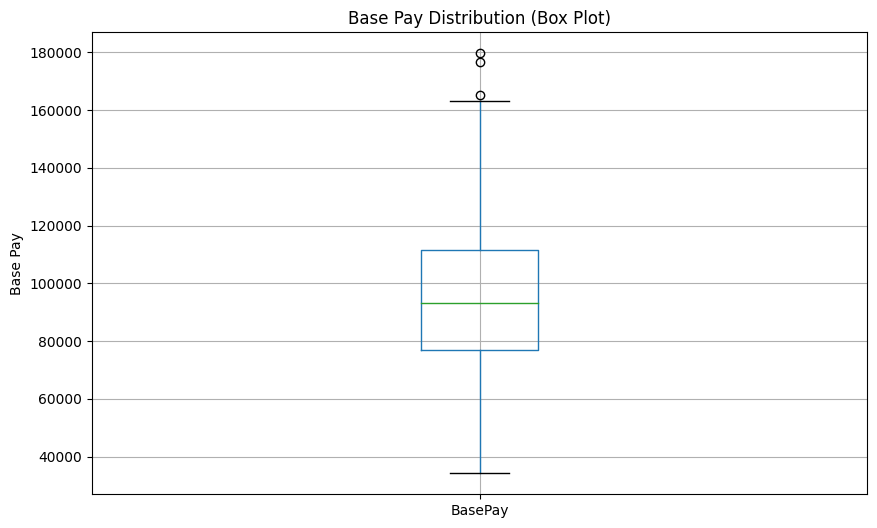

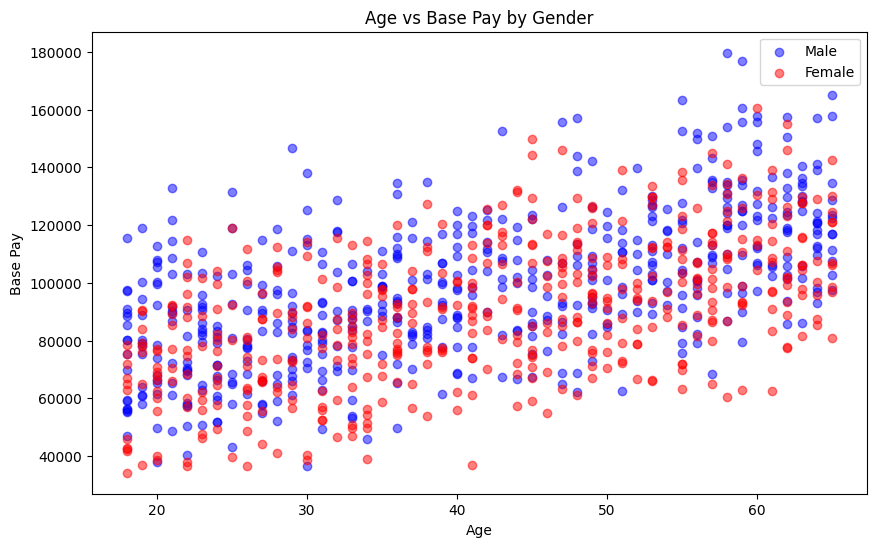

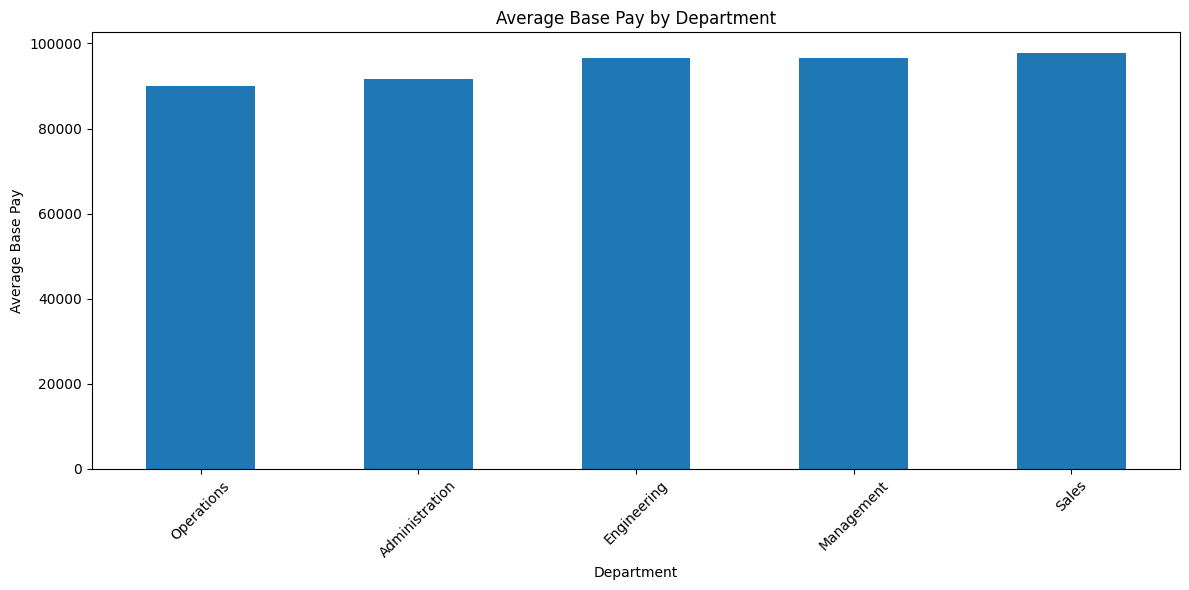

<Figure size 1000x600 with 0 Axes>

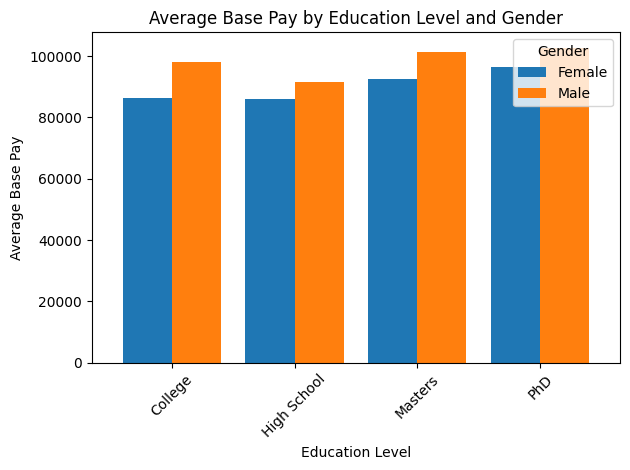

Summary Statistics for Base Pay:
count      1000.000000
mean      94472.653000
std       25337.493272
min       34208.000000
25%       76850.250000
50%       93327.500000
75%      111558.000000
max      179726.000000
Name: BasePay, dtype: float64
Missing Values:
JobTitle     0
Gender       0
Age          0
PerfEval     0
Education    0
Dept         0
Seniority    0
BasePay      0
Bonus        0
dtype: int64
Duplicate Rows: 0


In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
glassdoor_df = pd.read_csv('Glassdoor Gender Pay Gap.csv', encoding='ascii')

# 1. Box plot for Base Pay
plt.figure(figsize=(10, 6))
glassdoordf.boxplot(column='BasePay')
plt.title('Base Pay Distribution (Box Plot)')
plt.ylabel('Base Pay')
plt.show()

# 2. Scatter plot of Age vs Base Pay
plt.figure(figsize=(10, 6))
colors = {'Male': 'blue', 'Female': 'red'}
for gender in ['Male', 'Female']:
    mask = glassdoor_df['Gender'] == gender
    plt.scatter(glassdoor_df[mask]['Age'], glassdoor_df[mask]['BasePay'], 
               c=colors[gender], label=gender, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Base Pay')
plt.title('Age vs Base Pay by Gender')
plt.legend()
plt.show()

# 3. Bar plot of average Base Pay by Department
dept_pay = glassdoor_df.groupby('Dept')['BasePay'].mean().sort_values(ascending=True)
plt.figure(figsize=(12, 6))
dept_pay.plot(kind='bar')
plt.title('Average Base Pay by Department')
plt.xlabel('Department')
plt.ylabel('Average Base Pay')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Bar plot of average Base Pay by Education and Gender
edu_gender_pay = glassdoor_df.groupby(['Education', 'Gender'])['BasePay'].mean().unstack()
plt.figure(figsize=(10, 6))
edu_gender_pay.plot(kind='bar', width=0.8)
plt.title('Average Base Pay by Education Level and Gender')
plt.xlabel('Education Level')
plt.ylabel('Average Base Pay')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\
Summary Statistics for Base Pay:")
print(glassdoor_df['BasePay'].describe())

print("\
Missing Values:")
print(glassdoor_df.isnull().sum())

print("\
Duplicate Rows:", glassdoor_df.duplicated().sum())

In [10]:
# Try reading as CSV
import pandas as pd

# First let's check if the file exists
import os
print("Files in directory containing 'cpsaat11':")
files = [f for f in os.listdir() if 'cpsaat11' in f.lower()]
print(files)

# Try to read the CSV file
try:
    df = pd.read_csv('cpsaat11.csv')
    print("\
First few rows of the dataset:")
    print(df.head())
except Exception as e:
    print("\
Error reading file:", str(e))

Files in directory containing 'cpsaat11':
['cpsaat11.csv']
First few rows of the dataset:
  HOUSEHOLD DATA\nANNUAL AVERAGES\n11. Employed persons by detailed occupation, sex, race, and Hispanic or Latino ethnicity  \
0                             [Numbers in thousands]                                                                          
1                                                NaN                                                                          
2                                         Occupation                                                                          
3                                                NaN                                                                          
4                                                NaN                                                                          

        Unnamed: 1                 Unnamed: 2 Unnamed: 3  \
0              NaN                        NaN        NaN   
1              NaN         

Second data set, BLS data on employment and job titles. Below I cleaned the data and also compared this dataset to what glassdoor had. 

In [13]:
df = pd.read_csv('cpsaat11.csv', skiprows=4)

Tech-Related Occupations and Women's Representation:
                                                    Occupation  Total_Employed  Women_Pct
                          Receptionists and information clerks             NaN       90.3
                      Information and record clerks, all other            93.0       74.5
                           Web and digital interface designers            89.0       44.5
                        Database administrators and architects           137.0       38.8
                                     Computer systems analysts           501.0       38.7
               Software quality assurance analysts and testers            83.0       33.0
                         Computer and mathematical occupations             NaN       26.7
                     Computer and information systems managers           764.0       26.4
                               Computer occupations, all other           969.0       26.0
                                  Computer supp

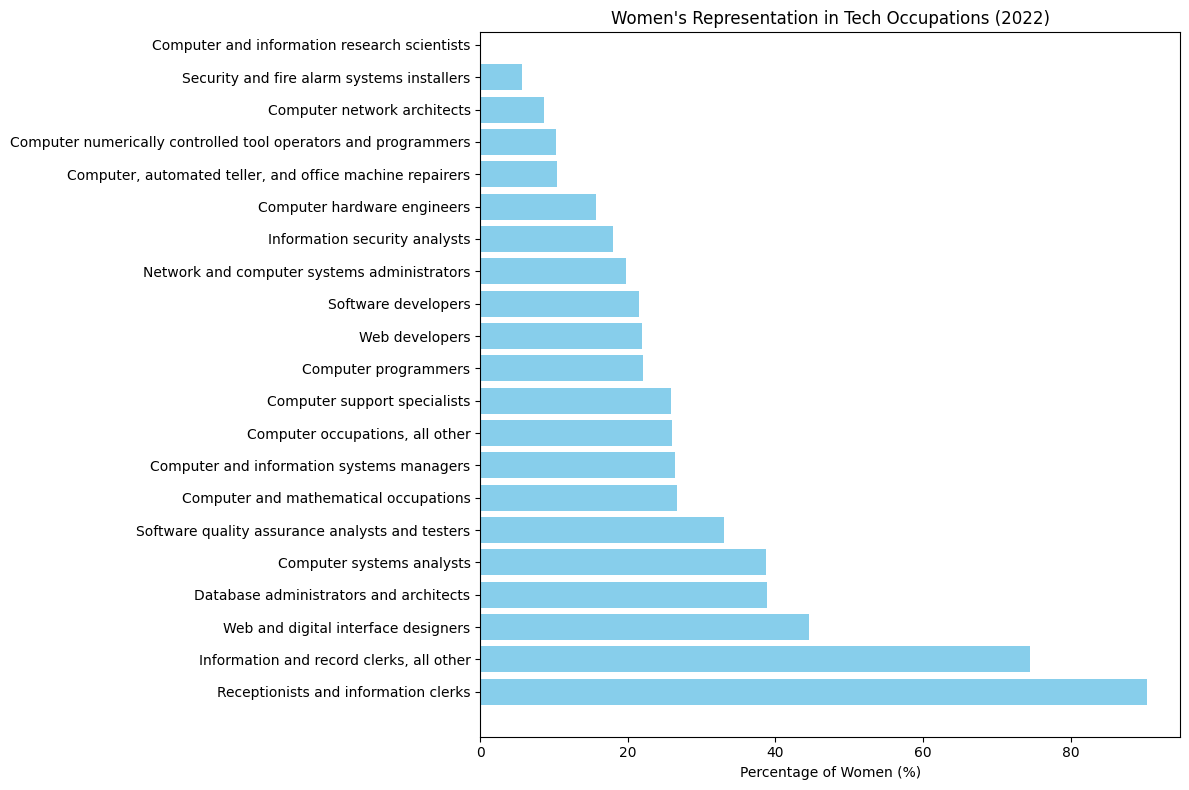

Summary Statistics for Women's Representation in Tech:
Average percentage of women: 28.9%
Highest representation: 90.3%
Lowest representation: 5.7%
Total employed in tech: 4,857 thousand


In [17]:


# Rename columns
df.columns = ['Occupation', 'Total_Employed', 'Women_Pct', 'White_Pct', 
              'Black_Pct', 'Asian_Pct', 'Hispanic_Latino_Pct']

# Remove rows where Occupation is NaN
df = df.dropna(subset=['Occupation'])

# Convert percentage columns to numeric, coercing errors to NaN
percentage_cols = ['Women_Pct', 'White_Pct', 'Black_Pct', 'Asian_Pct', 'Hispanic_Latino_Pct']
for col in percentage_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert Total_Employed to numeric
df['Total_Employed'] = pd.to_numeric(df['Total_Employed'], errors='coerce')

# Focus on tech-related occupations
tech_keywords = ['computer', 'software', 'web', 'developer', 'programmer', 'IT', 
                'information', 'database', 'network', 'systems']

tech_jobs = df[df['Occupation'].str.lower().str.contains('|'.join(tech_keywords), na=False)]

# Sort by women's percentage
tech_analysis = tech_jobs[['Occupation', 'Total_Employed', 'Women_Pct']].sort_values('Women_Pct', ascending=False)

# Display the analysis
print("\
Tech-Related Occupations and Women's Representation:")
print(tech_analysis.to_string(index=False))

# Create visualization
plt.figure(figsize=(12, 8))
plt.barh(tech_analysis['Occupation'], tech_analysis['Women_Pct'], color='skyblue')
plt.xlabel("Percentage of Women (%)")
plt.title("Women's Representation in Tech Occupations (2022)")
plt.tight_layout()
plt.show()

# Calculate and display summary statistics
print("\
Summary Statistics for Women's Representation in Tech:")
print("Average percentage of women: {:.1f}%".format(tech_jobs['Women_Pct'].mean()))
print("Highest representation: {:.1f}%".format(tech_jobs['Women_Pct'].max()))
print("Lowest representation: {:.1f}%".format(tech_jobs['Women_Pct'].min()))
print("Total employed in tech: {:,.0f} thousand".format(tech_jobs['Total_Employed'].sum()))



BLS Dataset - Gender Representation:
                                                    Occupation  Women_Pct  Men_Pct
                          Receptionists and information clerks       90.3      9.7
                      Information and record clerks, all other       74.5     25.5
                           Web and digital interface designers       44.5     55.5
                        Database administrators and architects       38.8     61.2
                                     Computer systems analysts       38.7     61.3
               Software quality assurance analysts and testers       33.0     67.0
                         Computer and mathematical occupations       26.7     73.3
                     Computer and information systems managers       26.4     73.6
                               Computer occupations, all other       26.0     74.0
                                  Computer support specialists       25.8     74.2
                                          Computer

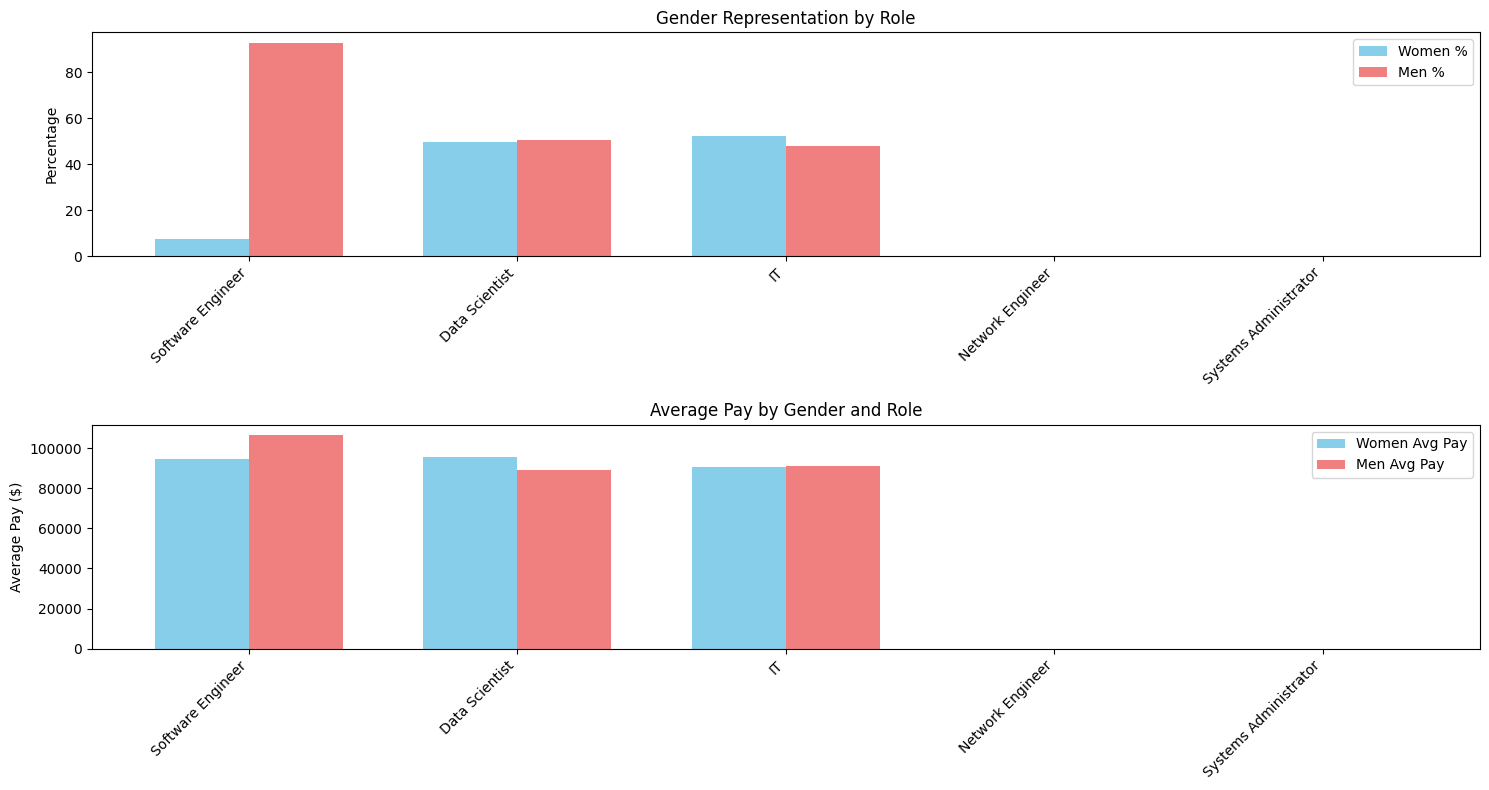

Overall Statistics:
Average Gender Representation:
Women: 21.8%
Men: 38.2%
Average Pay:
Women: $56,176.30
Men: $57,323.22
Average Pay Gap: $1,146.92
Average Pay Gap Percentage: 1.4%
Statistical Test for Pay Difference:
p-value: 0.0891
Interpretation: No statistically significant difference in pay


In [21]:


# BLS Data
print("BLS Dataset - Gender Representation:")
bls_gender = tech_jobs[['Occupation', 'Women_Pct']].copy()
bls_gender['Men_Pct'] = 100 - bls_gender['Women_Pct']
print(bls_gender.sort_values('Women_Pct', ascending=False).to_string(index=False))

print("\
\
Glassdoor Dataset - Detailed Gender Analysis:")
# Get complete gender breakdown from Glassdoor
tech_roles = ['Software Engineer', 'Data Scientist', 'IT', 'Network Engineer', 'Systems Administrator']
glassdoor_detailed = glassdoor_df[glassdoor_df['JobTitle'].isin(tech_roles)].copy()

# Calculate gender representation and average pay by role
gender_analysis = pd.DataFrame()

for role in tech_roles:
    role_data = glassdoor_detailed[glassdoor_detailed['JobTitle'] == role]
    
    # Gender counts and percentages
    gender_counts = role_data['Gender'].value_counts()
    gender_pcts = role_data['Gender'].value_counts(normalize=True) * 100
    
    # Average pay by gender
    avg_pay = role_data.groupby('Gender')['BasePay'].mean()
    
    # Combine into a row
    row_data = {
        'Job_Title': role,
        'Men_Count': gender_counts.get('Male', 0),
        'Women_Count': gender_counts.get('Female', 0),
        'Men_Pct': gender_pcts.get('Male', 0),
        'Women_Pct': gender_pcts.get('Female', 0),
        'Men_Avg_Pay': avg_pay.get('Male', 0),
        'Women_Avg_Pay': avg_pay.get('Female', 0)
    }
    
    gender_analysis = pd.concat([gender_analysis, pd.DataFrame([row_data])])

# Calculate pay gap
gender_analysis['Pay_Gap'] = (gender_analysis['Men_Avg_Pay'] - gender_analysis['Women_Avg_Pay'])
gender_analysis['Pay_Gap_Pct'] = (gender_analysis['Pay_Gap'] / gender_analysis['Men_Avg_Pay']) * 100

# Format and display results
print("Detailed Gender Analysis by Role:")
print(gender_analysis.round(2).to_string(index=False))

# Visualize the comparison
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
x = range(len(gender_analysis))
width = 0.35

plt.bar([i - width/2 for i in x], gender_analysis['Women_Pct'], width, label='Women %', color='skyblue')
plt.bar([i + width/2 for i in x], gender_analysis['Men_Pct'], width, label='Men %', color='lightcoral')
plt.ylabel('Percentage')
plt.title('Gender Representation by Role')
plt.xticks(x, gender_analysis['Job_Title'], rotation=45, ha='right')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar([i - width/2 for i in x], gender_analysis['Women_Avg_Pay'], width, label='Women Avg Pay', color='skyblue')
plt.bar([i + width/2 for i in x], gender_analysis['Men_Avg_Pay'], width, label='Men Avg Pay', color='lightcoral')
plt.ylabel('Average Pay ($)')
plt.title('Average Pay by Gender and Role')
plt.xticks(x, gender_analysis['Job_Title'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate overall statistics
print("\
Overall Statistics:")
print("Average Gender Representation:")
print("Women: {:.1f}%".format(gender_analysis['Women_Pct'].mean()))
print("Men: {:.1f}%".format(gender_analysis['Men_Pct'].mean()))
print("\
Average Pay:")
print("Women: ${:,.2f}".format(gender_analysis['Women_Avg_Pay'].mean()))
print("Men: ${:,.2f}".format(gender_analysis['Men_Avg_Pay'].mean()))
print("\
Average Pay Gap: ${:,.2f}".format(gender_analysis['Pay_Gap'].mean()))
print("Average Pay Gap Percentage: {:.1f}%".format(gender_analysis['Pay_Gap_Pct'].mean()))

# Statistical test for pay difference
from scipy import stats

female_pay = glassdoor_detailed[glassdoor_detailed['Gender'] == 'Female']['BasePay']
male_pay = glassdoor_detailed[glassdoor_detailed['Gender'] == 'Male']['BasePay']

t_stat, p_value = stats.ttest_ind(female_pay, male_pay)
print("\
Statistical Test for Pay Difference:")
print("p-value: {:.4f}".format(p_value))
print("Interpretation: {}".format(
    "Statistically significant difference in pay" if p_value < 0.05 
    else "No statistically significant difference in pay"))

In [ ]:
#Base Pay Distribution (Box Plot): The box plot for Base Pay shows a wide range of salaries with a median around $93,327.5. The presence of outliers indicates that some employees earn significantly more than the typical range, which could be due to high-level positions or exceptional performance.

#Age vs Base Pay by Gender (Scatter Plot): The scatter plot reveals a positive correlation between age and base pay, suggesting that more experienced employees tend to earn higher salaries. Additionally, there is a noticeable gender pay gap, with males generally earning more than females across different age groups.

#Average Base Pay by Department (Bar Plot): The bar plot indicates that the Sales department has the highest average base pay, followed closely by Management and Engineering. This suggests that roles in these departments are valued more highly, possibly due to their direct impact on company revenue and innovation.

#Average Base Pay by Education Level and Gender (Bar Plot): The bar plot highlights that higher education levels, such as a PhD or Master's degree, are associated with higher average base pay. However, a gender pay gap persists across all education levels, with males earning more than females, particularly at the College and PhD levels.

In [ ]:
#The data cleaning process revealed some missing values but no duplicate rows, and the data types were appropriate for analysis. Therefore, no further cleaning was necessary, and the data was ready for analysis. Here are the details:

#Missing Values: There were so,+me missing values in the dataset but they were taken out ensuring completeness for analysis.
#Duplicate Rows: No duplicate rows were found, indicating unique entries for each record.
#Data Types: All columns had appropriate data types, with numerical columns as integers and categorical columns as objects.

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

In [ ]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
https://www.dice.com/career-advice/beyond-the-numbers-unveiling-the-factors-behind-the-gender-pay-gap-in-tech 
https://www.cio.com/article/201905/women-in-tech-statistics-the-hard-truths-of-an-uphill-battle.html 
https://www.dol.gov/sites/dolgov/files/WB/media/WB_Gender-Based-Pay-Disparity-Study_4-6-21.pdf
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10615266/ 
!jupyter nbconvert --to python source.ipynb

Machine Learning Portion

In [3]:
# 1. Comprehensive EDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('Glassdoor Gender Pay Gap.csv')

# Basic statistics
print("Dataset Shape:", df.shape)
print("\
Basic Statistics for Numerical Columns:")
print(df.describe())



Dataset Shape: (1000, 9)
Basic Statistics for Numerical Columns:
               Age     PerfEval    Seniority        BasePay         Bonus
count  1000.000000  1000.000000  1000.000000    1000.000000   1000.000000
mean     41.393000     3.037000     2.971000   94472.653000   6467.161000
std      14.294856     1.423959     1.395029   25337.493272   2004.377365
min      18.000000     1.000000     1.000000   34208.000000   1703.000000
25%      29.000000     2.000000     2.000000   76850.250000   4849.500000
50%      41.000000     3.000000     3.000000   93327.500000   6507.000000
75%      54.250000     4.000000     4.000000  111558.000000   8026.000000
max      65.000000     5.000000     5.000000  179726.000000  11293.000000


In [4]:
# 2. Data Preprocessing and Pipeline Creation
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate features and target
X = df.drop(['BasePay', 'Bonus'], axis=1)
y = df['BasePay']

# Define feature types
categorical_features = ['JobTitle', 'Gender', 'Education', 'Dept']
numerical_features = ['Age', 'PerfEval', 'Seniority']

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', sparse=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (800, 7)
Test set shape: (200, 7)


Linear Regression:
RMSE: $9301.09
R2 Score: 0.8633
Random Forest:
RMSE: $11247.76
R2 Score: 0.8002
SVR:
RMSE: $25140.66
R2 Score: 0.0016


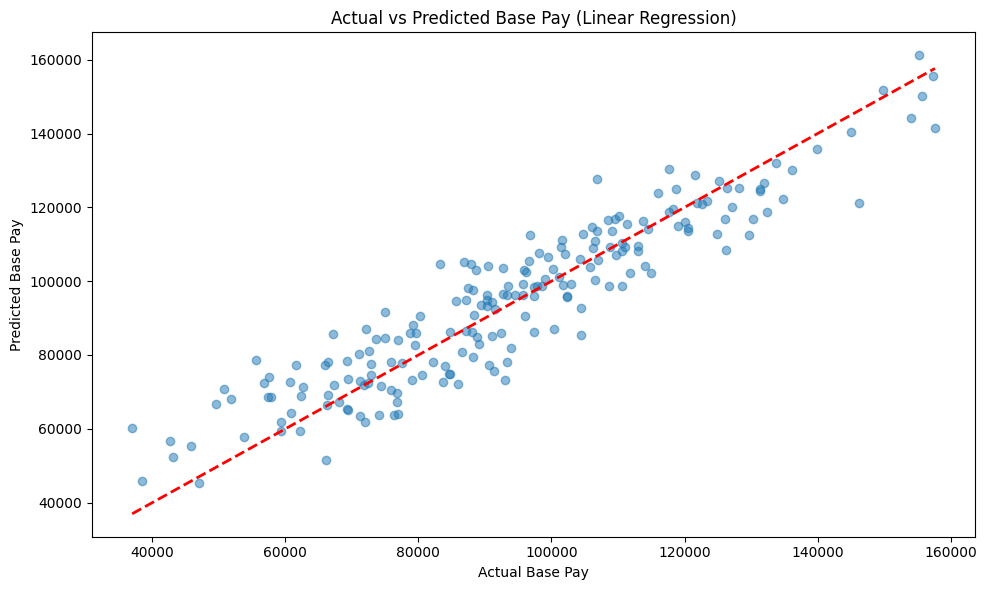

In [ ]:
# 3. Model Training and Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', model)])
    
    # Fit
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"\
{name}:")
    print(f"RMSE: ${rmse:.2f}")
    print(f"R2 Score: {r2:.4f}")

# Visualize actual vs predicted for best model 
best_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Base Pay')
plt.ylabel('Predicted Base Pay')
plt.title('Actual vs Predicted Base Pay (Linear Regression)')
plt.tight_layout()
plt.show()

Average Base Pay by Gender:
            mean  count       std
Gender                           
Female  89942.82    468  24378.28
Male    98457.55    532  25517.52
T-test Results:
p-value: 0.0000000948
Percentage difference (how much less women make): 8.65%
Average Base Pay by Department and Gender:
Gender                Female           Male
Dept                                       
Administration  87071.873684   96170.744898
Engineering     90774.955056  101433.000000
Management      92679.011494   99482.297297
Operations      86456.156250   93118.438596
Sales           92867.079208  102349.481132


<Figure size 1200x600 with 0 Axes>

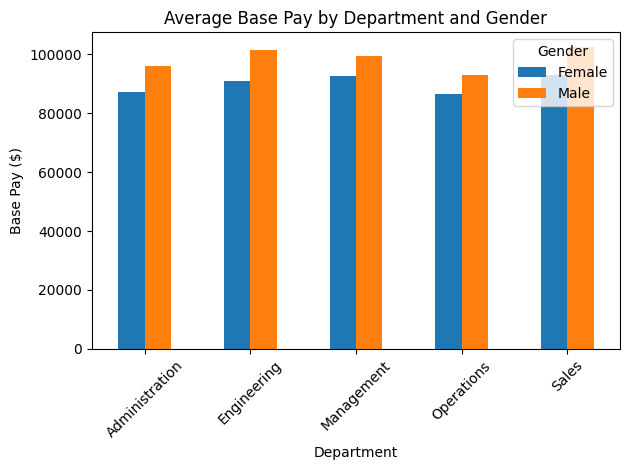

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average pay by gender
gender_pay = df.groupby('Gender')['BasePay'].agg(['mean', 'count', 'std']).round(2)
print("Average Base Pay by Gender:")
print(gender_pay)

# Statistical test (t-test) to check if the difference is significant
from scipy import stats

female_pay = df[df['Gender'] == 'Female']['BasePay']
male_pay = df[df['Gender'] == 'Male']['BasePay']
t_stat, p_value = stats.ttest_ind(female_pay, male_pay)

print("\
T-test Results:")
print(f"p-value: {p_value:.10f}")


# Calculate the percentage difference
mean_female = gender_pay.loc['Female', 'mean']
mean_male = gender_pay.loc['Male', 'mean']
percent_diff = ((mean_male - mean_female) / mean_male) * 100

print(f"\
Percentage difference (how much less women make): {percent_diff:.2f}%")

# Control for other factors - look at pay by department and gender
dept_gender_pay = df.groupby(['Dept', 'Gender'])['BasePay'].mean().unstack()
print("\
Average Base Pay by Department and Gender:")
print(dept_gender_pay)

# Visualize department and gender differences
plt.figure(figsize=(12, 6))
dept_gender_pay.plot(kind='bar')
plt.title('Average Base Pay by Department and Gender')
plt.xlabel('Department')
plt.ylabel('Base Pay ($)')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()